In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  r2_score


🟦 Problem Statement

The objective of this project is to classify Iris flowers into three different species — Setosa, Versicolor, and Virginica — using a supervised machine learning algorithm (Logistic Regression).

In [61]:
iris_data = load_iris()

iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target


🟦 Dataset Description

The Iris dataset is a well-known multi-class classification dataset containing 150 samples with the following four features:

Sepal Length (cm)

Sepal Width (cm)

Petal Length (cm)

Petal Width (cm)

The target variable is the species of the flower.

In [62]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


🟦 Exploratory Data Analysis (EDA):

Checked dataset structure using .info() and .describe()

Verified class balance using value_counts()

Visualized feature relationships using pairplots and scatterplots

Observed that petal features provide better separation among classes

In [64]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [65]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [66]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [67]:
iris['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

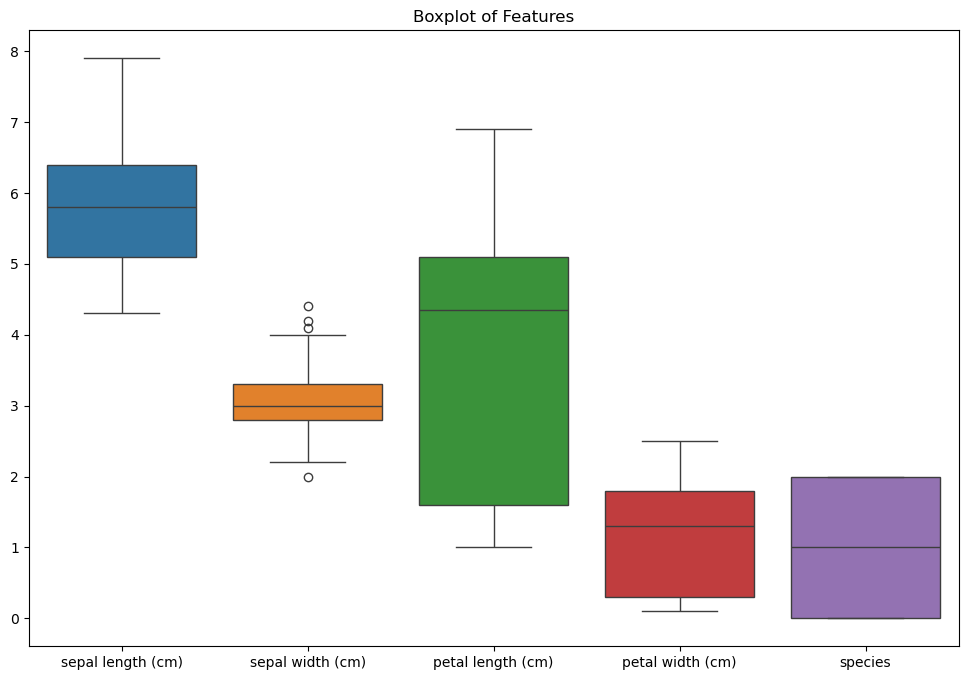

In [68]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=iris)
plt.title("Boxplot of Features")
plt.show()


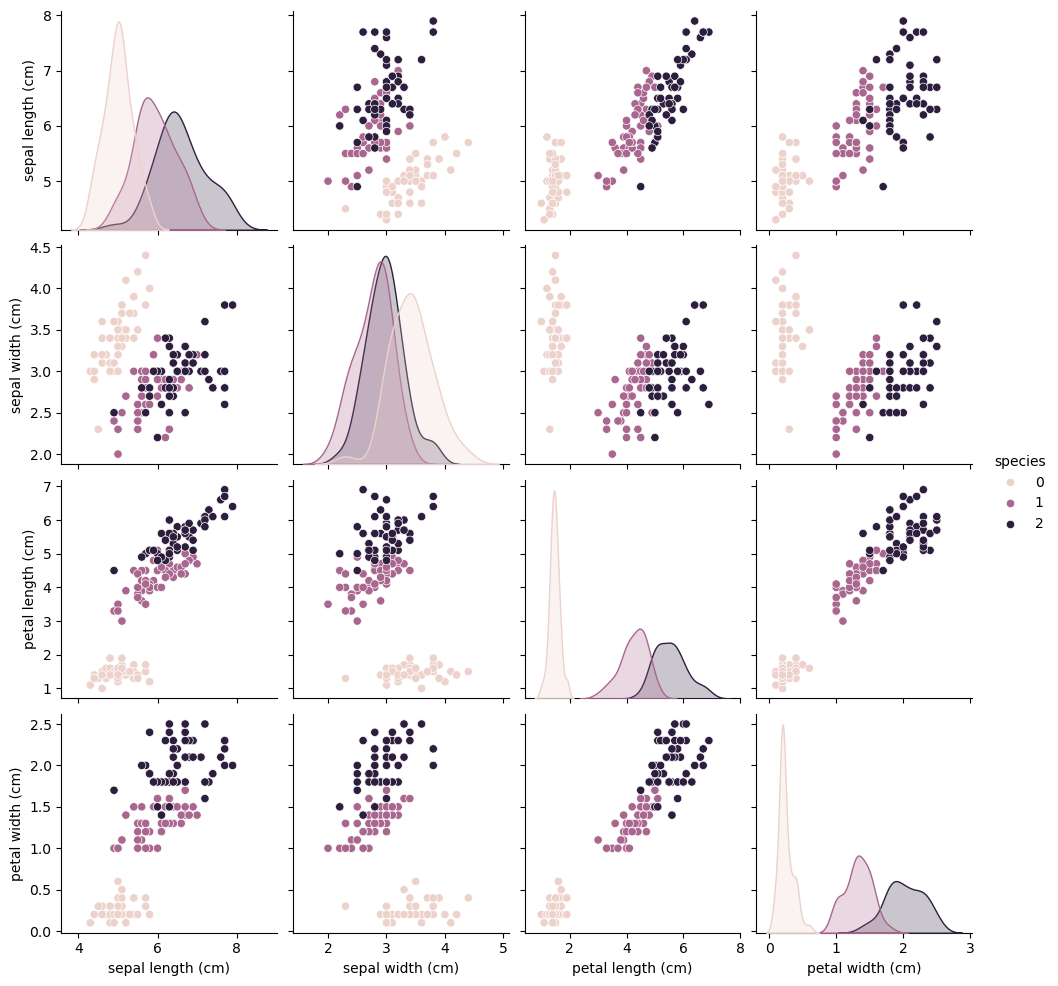

In [69]:
sns.pairplot(iris , hue = 'species')
plt.show()

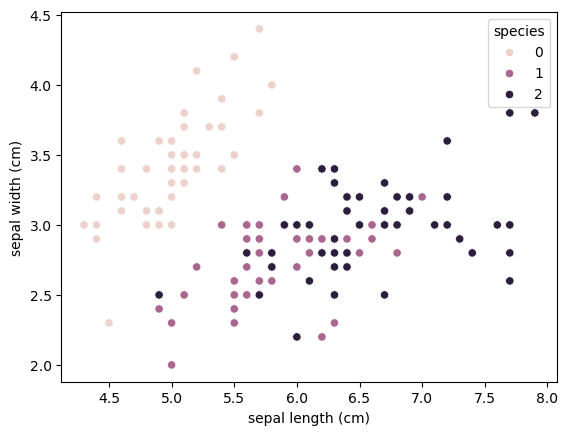

In [70]:
sns.scatterplot(x='sepal length (cm)', 
                y='sepal width (cm)', 
                hue='species', 
                data=iris)
plt.show()

In [71]:
corr = iris.drop(columns=['species']).corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


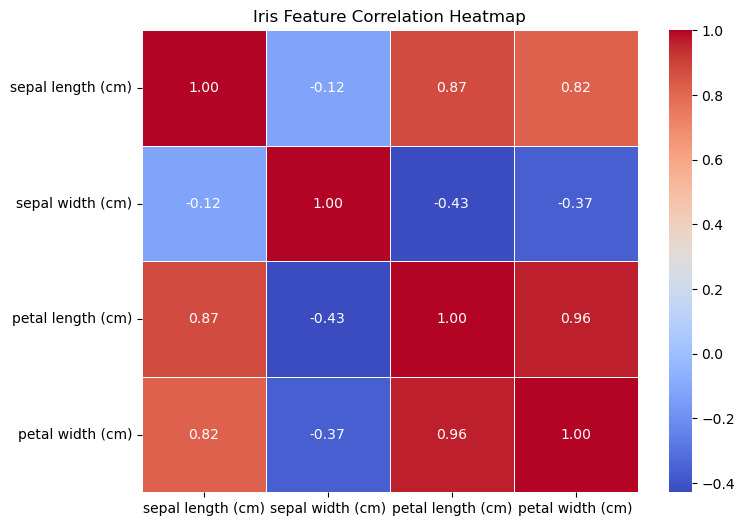

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Iris Feature Correlation Heatmap')
plt.show()

🟦 Data Preprocessing

Features (X) and target (y) were separated

Dataset was split into training and testing sets using train_test_split

Feature scaling was performed using StandardScaler because Logistic Regression is distance-based and performs better with standardized data

In [45]:
X = iris.drop('species', axis=1)
y = iris['species']


In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [47]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


🟦 Model Training

Logistic Regression algorithm was used for multi-class classification

Model was trained on scaled training data

max_iter was increased to ensure proper convergence

In [48]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [49]:
y_pred = model.predict(X_test)


🟦 Model Evaluation

The model was evaluated using multiple performance metrics:

Accuracy Score to measure overall correctness

Confusion Matrix to analyze class-wise predictions

Classification Report to evaluate precision, recall, and F1-score

R² Score (for learning purpose) to observe numerical alignment between predicted and actual labels

In [81]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 1.0
R2 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


🟦Model Performance

The Logistic Regression model achieved an accuracy of 1.0 (100%) on the test dataset.

In [82]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



🟦 Feature Importance Insight

From model coefficients, it was observed that petal length and petal width are the most important features in distinguishing between Iris species.

In [83]:
for i, col in enumerate(X.columns):
    print(col, model.coef_[0][i])

sepal length (cm) -1.0031658680456679
sepal width (cm) 1.14487317913478
petal length (cm) -1.8113482015488551
petal width (cm) -1.692510245285094


🟦 New Sample Prediction

The trained model was used to predict the class of a new flower sample after applying the same scaling process, demonstrating how the model can be used for real-world predictions.

In [84]:
import joblib
joblib.dump(model, 'iris_model.pkl')


['iris_model.pkl']

In [85]:
sample = pd.DataFrame(
    [[5.1, 3.5, 1.4, 0.2]],
    columns=X.columns
)

sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)
print("Predicted class:", prediction)


Predicted class: [0]
